# this project help customers predict home price in Chennai


## in this project we created linear,decision tree,random forest and XG Boosting models to predict house price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('train-chennai-sale.csv')
dataset.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [4]:
dataset.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

# Data Cleaning

In [5]:
dataset.drop_duplicates().shape

(7109, 22)

## Missing Value Handling

In [6]:
dataset['N_BATHROOM'].fillna(dataset['N_BATHROOM'].mode()[0],inplace=True)
dataset['N_BEDROOM'].fillna(dataset['N_BEDROOM'].mode()[0],inplace=True)
dataset.QS_OVERALL = dataset.QS_OVERALL.fillna(dataset.QS_OVERALL.mean())

In [7]:
dataset.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [8]:
dataset['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

## Drop unnessary columns(which is not impact to prediction or lead to misconception)

In [9]:
df=dataset.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)

In [10]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [11]:
#df['STREET'].unique() #paved=2 #gravel=1 #NoAccess=0
df.loc[df['STREET']=='Pavd','STREET']='Paved'
df.loc[df['STREET']=='NoAccess','STREET']='No Access'
df['STREET'].unique() #paved=2 #gravel=1 #NoAccess=0

array(['Paved', 'Gravel', 'No Access'], dtype=object)

# EDA

In [12]:
gp_s=df.groupby('STREET')['SALES_PRICE'].mean()
gp_s

STREET
Gravel       1.144462e+07
No Access    1.000074e+07
Paved        1.105754e+07
Name: SALES_PRICE, dtype: float64

<AxesSubplot:title={'center':'House Price in STREET'}, xlabel='STREET', ylabel='Mean Price'>

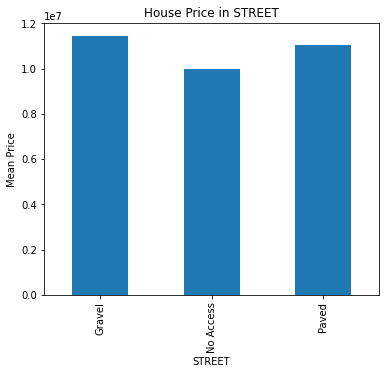

In [13]:
gp_s.plot(kind='bar', title='House Price in STREET', ylabel='Mean Price',
         xlabel='STREET', figsize=(6, 5))

In [14]:
df.loc[df['UTILITY_AVAIL']=='AllPub','UTILITY_AVAIL']='All Pub'
df['UTILITY_AVAIL'].isnull().sum()

0

In [15]:
gp_UA=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean()
gp_UA

UTILITY_AVAIL
All Pub    1.121002e+07
ELO        1.046941e+07
NoSeWa     1.089308e+07
NoSewr     1.092576e+07
Name: SALES_PRICE, dtype: float64

<AxesSubplot:title={'center':'House Price for UTILITY_AVAIL'}, xlabel='UTILITY_AVAIL', ylabel='Mean Price'>

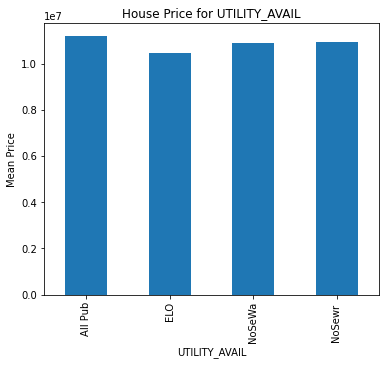

In [16]:
gp_UA.plot(kind='bar', title='House Price for UTILITY_AVAIL', ylabel='Mean Price',
         xlabel='UTILITY_AVAIL', figsize=(6, 5))

In [17]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].map({'All Pub':1.1210,'ELO':1.0469,'NoSeWa':1.0893,'NoSewr':1.0925})
df['UTILITY_AVAIL']

0       1.1210
1       1.1210
2       1.0469
3          NaN
4       1.1210
         ...  
7104    1.0469
7105    1.0893
7106    1.0893
7107    1.0469
7108    1.0469
Name: UTILITY_AVAIL, Length: 7109, dtype: float64

In [18]:
df['MZZONE'].unique()
gp_mzone=df.groupby('MZZONE')['SALES_PRICE'].mean()
gp_mzone

MZZONE
A     7.292591e+06
C     8.052270e+06
I     8.738633e+06
RH    1.103997e+07
RL    1.176576e+07
RM    1.240707e+07
Name: SALES_PRICE, dtype: float64

<AxesSubplot:title={'center':'House Price in MZONE'}, xlabel='MZONE', ylabel='Mean Price'>

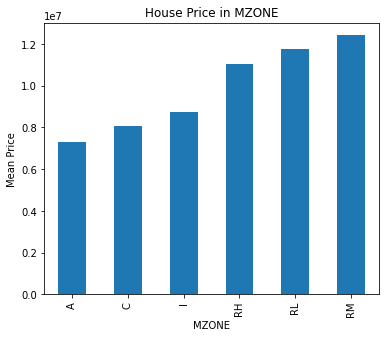

In [19]:
gp_mzone.plot(kind='bar', title='House Price in MZONE', ylabel='Mean Price',
         xlabel='MZONE', figsize=(6, 5))

## AREA MISS SPELLING REPLACE TO CORRECT WORD

In [20]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [21]:
df.loc[df["AREA"] == "Ana Nagar", "AREA"] = 'Anna Nagar'

df.loc[df["AREA"] == "Adyr", "AREA"] = 'Adyar'

df.loc[df["AREA"] == "Ann Nagar", "AREA"] = 'Anna Nagar'

df.loc[df["AREA"] == "Chormpet", "AREA"] = 'Chrompet'

df.loc[df["AREA"] == "Chrompt", "AREA"] = 'Chrompet'

df.loc[df["AREA"] == "Chrmpet", "AREA"] = 'Chrompet'

df.loc[df["AREA"] == "KKNagar", "AREA"] = 'KK Nagar'

df.loc[df["AREA"] == "Karapakam", "AREA"] = 'Karapakkam'

df.loc[df["AREA"] == "TNagar", "AREA"] = 'T Nagar'

df.loc[df["AREA"] == "Velchery", "AREA"] = 'Velachery'

In [22]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [23]:
grp1=df.groupby('AREA')['SALES_PRICE'].mean()
grp1

AREA
Adyar         9.185668e+06
Anna Nagar    1.516820e+07
Chrompet      1.001381e+07
KK Nagar      1.269623e+07
Karapakkam    7.340100e+06
T Nagar       1.561674e+07
Velachery     1.104735e+07
Name: SALES_PRICE, dtype: float64

<AxesSubplot:title={'center':'House Price in Areas'}, xlabel='AREA', ylabel='Mean Price'>

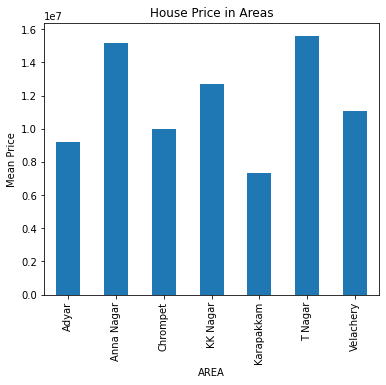

In [24]:
grp1.plot(kind='bar', title='House Price in Areas', ylabel='Mean Price',
         xlabel='AREA', figsize=(6, 5))

In [25]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [26]:
## Secod sale MISS SPELLING REPLACE TO CORRECT WORD

In [27]:
df.loc[df["SALE_COND"] == 'Ab Normal', 'SALE_COND'] = 'AbNormal'
df.loc[df['SALE_COND']=='Partiall','SALE_COND']='Partial'
df.loc[df['SALE_COND']=='PartiaLl','SALE_COND']='Partial'
df.loc[df['SALE_COND']=='Adj Land','SALE_COND']='AdjLand'

In [28]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [29]:
grp2=df.groupby('SALE_COND')['SALES_PRICE'].mean()
grp2

SALE_COND
AbNormal       1.091463e+07
AdjLand        1.120931e+07
Family         1.073642e+07
Normal Sale    1.099418e+07
Partial        1.061637e+07
Name: SALES_PRICE, dtype: float64

<AxesSubplot:title={'center':'House Price in SALE_COND'}, xlabel='SALE_COND', ylabel='Mean Price'>

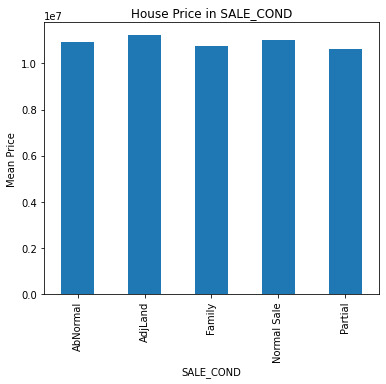

In [30]:
grp2.plot(kind='bar', title='House Price in SALE_COND', ylabel='Mean Price',
         xlabel='SALE_COND', figsize=(6, 5))

In [31]:
df['DATE_SALE'].unique()

array(['04-05-2011', '19-12-2006', '04-02-2012', ..., '28-03-2014',
       '25-08-2006', '13-07-2005'], dtype=object)

## Finding Age of the according to DATE_BUILD date

In [32]:
y=df['DATE_BUILD'].str[6:]
ser = pd.Series(y)
year=pd.to_numeric(ser, downcast ='signed')
Age=2022-year

In [33]:
uniqueAges=Age.sort_values().unique()
uniqueAges

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73], dtype=int16)

## Adding Age Column

In [34]:
df['Age']=Age

In [35]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,1.1210,Paved,A,4.0,3.9,4.9,4.330,7600000,55
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,1.1210,Gravel,RH,4.9,4.2,2.5,3.765,21717770,27
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,1.0469,Gravel,RL,4.1,3.8,2.2,3.090,13159200,30
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NaN,Paved,I,4.7,3.9,3.6,4.010,9630290,34
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,1.1210,Gravel,C,3.0,2.5,4.1,3.290,7406250,43


In [36]:
gphb=df.groupby('Age')['SALES_PRICE'].mean()
gphb

Age
12    1.002291e+07
13    1.320975e+07
14    1.274462e+07
15    1.124737e+07
16    1.094184e+07
          ...     
69    9.387892e+06
70    9.603261e+06
71    9.470893e+06
72    6.761640e+06
73    1.288525e+07
Name: SALES_PRICE, Length: 62, dtype: float64

<AxesSubplot:title={'center':'House Price in Age'}, xlabel='Age', ylabel='Mean Price'>

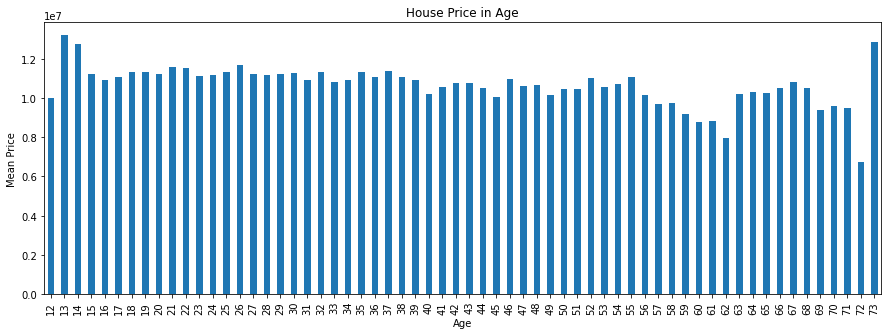

In [37]:
gphb.plot(kind='bar', title='House Price in Age', ylabel='Mean Price',
         xlabel='Age', figsize=(15, 5))

Above bar chart shows there is no relation between age and House Price

In [38]:

## BUILDTYPE MISS SPELLING REPLACE TO CORRECT WORD
df.loc[df['BUILDTYPE']=='Other','BUILDTYPE']='Others'
df.loc[df['BUILDTYPE']=='Comercial','BUILDTYPE']='Commercial'
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

<AxesSubplot:xlabel='BUILDTYPE'>

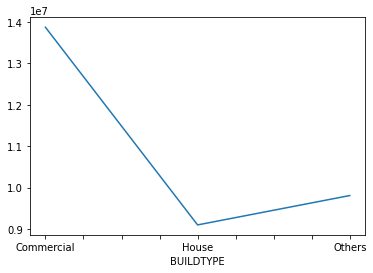

In [39]:
gpbt=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().plot()
gpbt

In [40]:
gpbt.plot(kind='bar', title='Price according to buildtype', ylabel='Mean Price',
         xlabel='BUILDTYPE', figsize=(5, 3))

[]

In [41]:
df['DIST_MAINROAD'].unique()

array([131,  26,  70,  14,  84,  36, 137, 176, 175,  74,  78, 143,  83,
       157, 148, 134,  69, 168,  53,  96, 114, 100, 111, 105,  29,  59,
       185, 138, 173,  15, 117,  16, 130,  46, 180,  52,  86,  49, 113,
       189,  28,  51,  19, 167, 126,  75, 154,  25, 187, 200,  32,  11,
        23,  13,  58,  89,  48,  39, 177, 116,  41, 192,  72,  24,  43,
        85, 171, 149,  73,  62, 145, 125, 121, 129,   6, 103,   8,  50,
        67,   0, 147,  71,  34, 178, 106, 144, 135,  38,  40, 142,  79,
        20,  99, 166,  63,  44,  60,  90, 169,  10, 122, 108,  98,  57,
       104,  17,   1, 109, 164, 136,  97,  37,   9, 181,  93,  81, 193,
        95, 196, 141, 158, 174,  94, 124,  82,  76, 190, 194,  54,  64,
        65, 153, 115, 102,  77, 182, 163,  88,  66, 119,  18, 188, 112,
       120, 159,   4, 123,  31,   2, 156, 184, 170, 110,   7, 152,  27,
       198, 183,  12,  45, 161,  30, 118,  33,  61, 191, 160, 140,  47,
       146, 128,  80,  55, 151,   3,  92,  22,  35, 101, 127, 19

In [42]:
df.groupby('DIST_MAINROAD')['SALES_PRICE'].mean()

DIST_MAINROAD
0      1.083050e+07
1      1.081971e+07
2      1.075036e+07
3      1.008131e+07
4      1.168169e+07
           ...     
196    1.109426e+07
197    1.186536e+07
198    1.092855e+07
199    1.118152e+07
200    1.001123e+07
Name: SALES_PRICE, Length: 201, dtype: float64

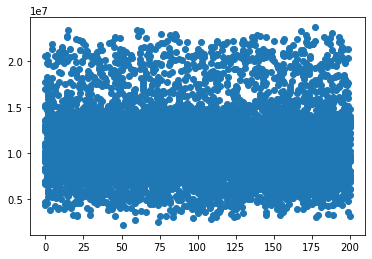

In [43]:
x=df['DIST_MAINROAD']
y=df['SALES_PRICE']
plt.scatter(x, y)
plt.show()

In [44]:

df['N_ROOM'].unique()

array([3, 5, 4, 2, 6], dtype=int64)

In [45]:
gbr=df.groupby('N_ROOM')['SALES_PRICE'].mean()
gbr

N_ROOM
2    6.982718e+06
3    9.298812e+06
4    1.169143e+07
5    1.414533e+07
6    1.445131e+07
Name: SALES_PRICE, dtype: float64

<AxesSubplot:title={'center':'Price according to no of Rooms'}, xlabel='No of Rooms', ylabel='Mean Price'>

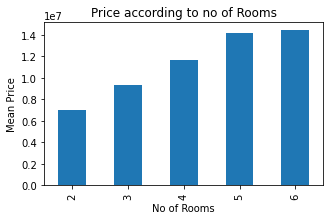

In [46]:
gbr.plot(kind='bar', title='Price according to no of Rooms', ylabel='Mean Price',
         xlabel='No of Rooms', figsize=(5, 3))

# Encoding using map

In [47]:
df['AREA']=df['AREA'].map({'Adyar':9.1856,'Anna Nagar':15.1682,'Chrompet':10.0138,'KK Nagar':12.6962,'Karapakkam':7.3401,'T Nagar':15.6167,'Velachery':11.0473})
df['AREA']

0        7.3401
1       15.1682
2        9.1856
3       11.0473
4        7.3401
         ...   
7104     7.3401
7105    11.0473
7106    11.0473
7107     7.3401
7108    11.0473
Name: AREA, Length: 7109, dtype: float64

In [48]:
df['MZZONE']=df['MZZONE'].map({'A':0.7292,'C':0.8052,'I':0.8738,'RH':1.1039,'RL':1.1765,'RM':1.2407})
df['MZZONE']

0       0.7292
1       1.1039
2       1.1765
3       0.8738
4       0.8052
         ...  
7104    1.2407
7105    1.1039
7106    0.8738
7107    1.1765
7108    0.8738
Name: MZZONE, Length: 7109, dtype: float64

In [49]:
df['BUILDTYPE']=df['BUILDTYPE'].map({'Commercial':13.8698,'House':9.0988,'Others':9.8079})
df['BUILDTYPE']

0       13.8698
1       13.8698
2       13.8698
3        9.8079
4        9.8079
         ...   
7104     9.8079
7105     9.8079
7106     9.0988
7107    13.8698
7108     9.8079
Name: BUILDTYPE, Length: 7109, dtype: float64

In [50]:
df['SALE_COND']=df['SALE_COND'].map({'AbNormal':1.0914,'AdjLand': 1.1209,'Family':1.0736,'Normal Sale':1.0994,'Partial':1.0616})
df['SALE_COND']

0       1.0914
1       1.0914
2       1.0914
3       1.0736
4       1.0914
         ...  
7104    1.1209
7105    1.0736
7106    1.0994
7107    1.0616
7108    1.0616
Name: SALE_COND, Length: 7109, dtype: float64

In [51]:
df['STREET']=df['STREET'].map({'Gravel':1.1444,'No Access':1.0000,'Paved':1.1057})
df['STREET']

0       1.1057
1       1.1444
2       1.1444
3       1.1057
4       1.1444
         ...  
7104    1.0000
7105    1.0000
7106    1.1444
7107    1.1057
7108    1.1057
Name: STREET, Length: 7109, dtype: float64

In [52]:
df['PARK_FACIL'].unique()
df.loc[df['PARK_FACIL']=='Noo','PARK_FACIL']='No'
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [53]:
df['PARK_FACIL']=df['PARK_FACIL'].map({'Yes':1,'No':0})

In [54]:
df['PARK_FACIL']

0       1
1       0
2       1
3       0
4       1
       ..
7104    0
7105    1
7106    0
7107    1
7108    1
Name: PARK_FACIL, Length: 7109, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   float64
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   float64
 5   N_BATHROOM     7109 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   float64
 8   PARK_FACIL     7109 non-null   int64  
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   float64
 11  UTILITY_AVAIL  5280 non-null   float64
 12  STREET         7109 non-null   float64
 13  MZZONE         7109 non-null   float64
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  SALES_PR

# according to analysis i neglect these features
#1.DATE_SALE      
#2.DIST_MAINROAD
#3.DATE_BUILD and AGE

In [56]:
X=df[['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','STREET','MZZONE','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']]

In [57]:
df['UTILITY_AVAIL'].unique()

array([1.121 , 1.0469,    nan, 1.0893])

In [58]:
X.isnull().sum()

AREA           0
INT_SQFT       0
N_BEDROOM      0
N_BATHROOM     0
N_ROOM         0
SALE_COND      0
PARK_FACIL     0
BUILDTYPE      0
STREET         0
MZZONE         0
QS_ROOMS       0
QS_BATHROOM    0
QS_BEDROOM     0
QS_OVERALL     0
dtype: int64

In [59]:
y=df['SALES_PRICE']
y.shape

(7109,)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [61]:
X_train.shape,y_train.shape

((4976, 14), (4976,))

In [62]:
X_test.shape,y_test.shape

((2133, 14), (2133,))

In [63]:
#from sklearn.preprocessing import StandardScaler ## standrard scalig 
#scaler = StandardScaler() #initialise to a variable
#scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
#X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
#X_test_scaled = scaler.transform(X_test) # transform the test data 

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  

regressor.fit(X_train, y_train) 

LinearRegression()

In [66]:
print(regressor.intercept_) # c

10936698.562098073


In [67]:
print(regressor.coef_) # 'AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','STREET','MZZONE','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'

[ 1187068.31010745   622790.01344596 -1020707.53400418   116657.5514216
  1533622.14940896   219256.35543503   504958.63820657  2071593.04154972
   396427.02646214   858358.75681275   -17008.75778329   -11943.43856299
    -4738.65820039    32308.14049854]


In [68]:
coeff_df=pd.DataFrame(regressor.coef_,['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE',
                                       'STREET','MZZONE','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'], columns=['Coefficient'])
coeff_df

,Coefficient
AREA,1.187068e+06
INT_SQFT,6.227900e+05
N_BEDROOM,-1.020708e+06
N_BATHROOM,1.166576e+05
N_ROOM,1.533622e+06
SALE_COND,2.192564e+05
PARK_FACIL,5.049586e+05
BUILDTYPE,2.071593e+06
STREET,3.964270e+05
MZZONE,8.583588e+05


In [69]:
y_pred = regressor.predict(X_test) 

In [70]:
ldf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ldf

,Actual,Predicted
3517,12544800,1.210546e+07
2663,11244250,1.238211e+07
5650,13081220,1.318155e+07
4354,10455360,1.131273e+07
4835,9786000,9.435356e+06
...,...,...
2957,7596170,8.345952e+06
1769,12807300,1.232881e+07
2129,8925160,1.046355e+07
6758,9896880,1.107866e+07


In [71]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.91857430670033


In [72]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 6)
# Fit dt to the training set
dt.fit(X_train, y_train)
importance = dt.feature_importances_
idf=pd.DataFrame(importance,['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE',
                                       'STREET','MZZONE','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'], columns=['Feature Importance'])
print(idf)


             Feature Importance
AREA                   0.034987
INT_SQFT               0.226525
N_BEDROOM              0.000000
N_BATHROOM             0.000000
N_ROOM                 0.017333
SALE_COND              0.087704
PARK_FACIL             0.064889
BUILDTYPE              0.071440
STREET                 0.017333
MZZONE                 0.052753
QS_ROOMS               0.174745
QS_BATHROOM            0.056334
QS_BEDROOM             0.142036
QS_OVERALL             0.053921


# PREDICTION USING DECISION TREE REGRESSOR

In [73]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor()

# Fit dt to the training set
dt.fit(X_train, y_train)
dy_pred=dt.predict(X_test)

In [74]:
decisiontree_prediction=pd.DataFrame({'Actual': y_test, 'Predicted': dy_pred})
decisiontree_prediction

,Actual,Predicted
3517,12544800,12038110.0
2663,11244250,12252250.0
5650,13081220,13715380.0
4354,10455360,10630800.0
4835,9786000,8539250.0
...,...,...
2957,7596170,8027540.0
1769,12807300,13144050.0
2129,8925160,9478820.0
6758,9896880,9218040.0


In [75]:
from sklearn.metrics import  r2_score

# Compute y_pred
dy_pred = dt.predict(X_test)

# Compute mse_dt
rsquared = r2_score(y_test,dy_pred)
# Compute rmse_dt
print('r2_score of decision regressor :',rsquared)

# Print rmse_dt
#print("Test set R2 of dt: {:.2f}".format(rsquared))

r2_score of decision regressor : 0.9627718494174824


# PREDICTION USING USING RANDOM FOREST REGRESSOR

In [76]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(random_state=0)

In [77]:
dy1_pred=regressor.predict(X_test)

In [78]:
dy1_pred

array([11863736.2, 11886737.5, 13544381.7, ...,  9204962.6,  9824981. ,
       13195119.9])

In [79]:
decisiontree_prediction=pd.DataFrame({'Actual': y_test, 'Predicted': dy1_pred})
decisiontree_prediction

,Actual,Predicted
3517,12544800,11863736.20
2663,11244250,11886737.50
5650,13081220,13544381.70
4354,10455360,10630494.80
4835,9786000,8786802.50
...,...,...
2957,7596170,8248207.90
1769,12807300,12929372.35
2129,8925160,9204962.60
6758,9896880,9824981.00


In [80]:
from sklearn.metrics import  r2_score

# Compute y_pred
dy1_pred = regressor.predict(X_test)

# Compute mse_dt
random_forest_regressor_score = r2_score(y_test,dy1_pred)
# Compute rmse_dt
print('r2_score of RANDOM FOREST  regressor :',random_forest_regressor_score)

# Print rmse_dt
#print("Test set R2 of dt: {:.2f}".format(rsquared))

r2_score of RANDOM FOREST  regressor : 0.9845544037404975


# PREDICTION USING XGBRegressor

In [82]:
import xgboost 

In [86]:

import xgboost as xg

from sklearn.metrics import mean_squared_error as MSE
  

xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)
  
xgbooster_prediction=pd.DataFrame({'Actual': y_test, 'Predicted': pred})
xgbooster_prediction



[10:56:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


,Actual,Predicted
3517,12544800,11368899.0
2663,11244250,10927705.0
5650,13081220,12933392.0
4354,10455360,10568798.0
4835,9786000,9100518.0
...,...,...
2957,7596170,7476209.5
1769,12807300,12602765.0
2129,8925160,8908652.0
6758,9896880,9699678.0


In [88]:
# Compute r2 of xg booster
xgbooster_score = r2_score(y_test,pred)

print('r2_score of RANDOM FOREST  regressor :',xgbooster_score)

r2_score of RANDOM FOREST  regressor : 0.9742579607632595


In [89]:
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  599135.469559
